In [2]:
import pandas as pd

In [5]:
df_json = pd.read_json("Sarcasm_Headlines_Dataset.json",orient="records",lines=True)
df_json=df_json.head()
df_json

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
df_json.to_json("test.json")

In [7]:
df_json.to_json("test2.json",orient="records")

In [8]:
df_json.to_json("test3.json",orient="records",lines=True) # lines=True 只能与records一块使用

In [9]:
data=pd.read_csv("IMDB-Movie-Data.csv")
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [10]:
# 找缺失值
data.notnull().all() # 按照列 查看某一列是否都为true

Rank                   True
Title                  True
Genre                  True
Description            True
Director               True
Actors                 True
Year                   True
Runtime (Minutes)      True
Rating                 True
Votes                  True
Revenue (Millions)    False
Metascore             False
dtype: bool

In [11]:
data.shape

(1000, 12)

In [12]:
data2=data.dropna() # 默认是删除行

In [13]:
data2.shape

(838, 12)

In [14]:
data2.notnull().all()

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool

In [15]:
data3=data.dropna(axis=1)
data3.shape

(1000, 10)

In [16]:
data3.notnull().all()

Rank                 True
Title                True
Genre                True
Description          True
Director             True
Actors               True
Year                 True
Runtime (Minutes)    True
Rating               True
Votes                True
dtype: bool

In [17]:
data['Revenue (Millions)'].fillna(data['Revenue (Millions)'].mean(),inplace=True)

In [18]:
data.notnull().all()

Rank                   True
Title                  True
Genre                  True
Description            True
Director               True
Actors                 True
Year                   True
Runtime (Minutes)      True
Rating                 True
Votes                  True
Revenue (Millions)     True
Metascore             False
dtype: bool

In [19]:
data['Metascore'].fillna(data['Metascore'].mean(),inplace=True)

In [20]:
data.shape

(1000, 12)

In [23]:
type(np.nan)

float

In [25]:
test=pd.read_csv("test.csv")
test

,id,value1,value2,value3
0,1,123,1.4,23
1,2,110,0.0,18
2,3,?,2.1,19


In [26]:
test.notnull()

,id,value1,value2,value3
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True


In [27]:
# 把特殊标记的数据替换为nan
test=test.replace(to_replace="?",value=np.nan)

In [28]:
test

,id,value1,value2,value3
0,1,123,1.4,23
1,2,110,0.0,18
2,3,NaN,2.1,19


In [29]:
test.dropna(axis=1)

,id,value2,value3
0,1,1.4,23
1,2,0.0,18
2,3,2.1,19


In [30]:
data = pd.read_csv("stock_day.csv")
p_change= data['p_change']
p_change.head()

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
Name: p_change, dtype: float64

In [31]:
qcut=pd.qcut(p_change,10)
qcut.head()

2018-02-27    (1.738, 2.938]
2018-02-26     (2.938, 5.27]
2018-02-23    (1.738, 2.938]
2018-02-22     (0.94, 1.738]
2018-02-14    (1.738, 2.938]
Name: p_change, dtype: category
Categories (10, interval[float64]): [(-10.030999999999999, -4.836] < (-4.836, -2.444] < (-2.444, -1.352] < (-1.352, -0.462] ... (0.94, 1.738] < (1.738, 2.938] < (2.938, 5.27] < (5.27, 10.03]]

In [32]:
qcut.value_counts()

(5.27, 10.03]                    65
(0.26, 0.94]                     65
(-0.462, 0.26]                   65
(-10.030999999999999, -4.836]    65
(2.938, 5.27]                    64
(1.738, 2.938]                   64
(-1.352, -0.462]                 64
(-2.444, -1.352]                 64
(-4.836, -2.444]                 64
(0.94, 1.738]                    63
Name: p_change, dtype: int64

In [33]:
pd.get_dummies(qcut,prefix="qcut")

,"qcut_(-10.030999999999999, -4.836]","qcut_(-4.836, -2.444]","qcut_(-2.444, -1.352]","qcut_(-1.352, -0.462]","qcut_(-0.462, 0.26]","qcut_(0.26, 0.94]","qcut_(0.94, 1.738]","qcut_(1.738, 2.938]","qcut_(2.938, 5.27]","qcut_(5.27, 10.03]"
2018-02-27,0,0,0,0,0,0,0,1,0,0
2018-02-26,0,0,0,0,0,0,0,0,1,0
2018-02-23,0,0,0,0,0,0,0,1,0,0
2018-02-22,0,0,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,0,0,0,1,0,0
2018-02-13,0,0,0,0,0,0,1,0,0,0
2018-02-12,0,0,0,0,0,0,0,0,1,0
2018-02-09,1,0,0,0,0,0,0,0,0,0
2018-02-08,0,0,0,0,0,1,0,0,0,0
2018-02-07,0,0,1,0,0,0,0,0,0,0


In [34]:
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
cut=pd.cut(p_change,bins)
cut.head()

2018-02-27    (0, 3]
2018-02-26    (3, 5]
2018-02-23    (0, 3]
2018-02-22    (0, 3]
2018-02-14    (0, 3]
Name: p_change, dtype: category
Categories (8, interval[int64]): [(-100, -7] < (-7, -5] < (-5, -3] < (-3, 0] < (0, 3] < (3, 5] < (5, 7] < (7, 100]]

In [35]:
cut.value_counts()

(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(7, 100]       35
(5, 7]         35
(-100, -7]     34
(-7, -5]       28
Name: p_change, dtype: int64

In [36]:
dum=pd.get_dummies(cut,prefix="cut")
dum

,"cut_(-100, -7]","cut_(-7, -5]","cut_(-5, -3]","cut_(-3, 0]","cut_(0, 3]","cut_(3, 5]","cut_(5, 7]","cut_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0
2018-02-13,0,0,0,0,1,0,0,0
2018-02-12,0,0,0,0,0,1,0,0
2018-02-09,0,1,0,0,0,0,0,0
2018-02-08,0,0,0,0,1,0,0,0
2018-02-07,0,0,0,1,0,0,0,0


In [37]:
df=pd.concat([p_change,dum]) # 默认竖直方向合并 结果的行数时两个数据行累加
df

D:\Anaconda\lib\site-packages\pandas\core\indexes\api.py:87: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,0,"cut_(-100, -7]","cut_(-7, -5]","cut_(-5, -3]","cut_(-3, 0]","cut_(0, 3]","cut_(3, 5]","cut_(5, 7]","cut_(7, 100]"
2018-02-27,2.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-26,3.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-23,2.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-22,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-14,2.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-13,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-12,4.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-09,-6.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-08,0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-07,-2.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
p_change.shape

(643,)

In [39]:
dum.shape

(643, 8)

In [40]:
df=pd.concat([p_change,dum],axis=1) # 默认水平方向合并 结果的列数时两个数据列累加
df

,p_change,"cut_(-100, -7]","cut_(-7, -5]","cut_(-5, -3]","cut_(-3, 0]","cut_(0, 3]","cut_(3, 5]","cut_(5, 7]","cut_(7, 100]"
2018-02-27,2.68,0,0,0,0,1,0,0,0
2018-02-26,3.02,0,0,0,0,0,1,0,0
2018-02-23,2.42,0,0,0,0,1,0,0,0
2018-02-22,1.64,0,0,0,0,1,0,0,0
2018-02-14,2.05,0,0,0,0,1,0,0,0
2018-02-13,1.32,0,0,0,0,1,0,0,0
2018-02-12,4.03,0,0,0,0,0,1,0,0
2018-02-09,-6.86,0,1,0,0,0,0,0,0
2018-02-08,0.41,0,0,0,0,1,0,0,0
2018-02-07,-2.24,0,0,0,1,0,0,0,0


In [41]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [42]:
left

,A,B,key1,key2
0,A0,B0,K0,K0
1,A1,B1,K0,K1
2,A2,B2,K1,K0
3,A3,B3,K2,K1


In [43]:
right

,C,D,key1,key2
0,C0,D0,K0,K0
1,C1,D1,K1,K0
2,C2,D2,K1,K0
3,C3,D3,K2,K0


In [44]:
pd.merge(left,right,how="outer") # 外连接  = 左连接 + 右连接 结果去重

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN
5,NaN,NaN,K2,K0,C3,D3


In [45]:
pd.merge(left,right,on=['key1','key2']) # inner join  不写on时，按照相同的列名连接

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


In [46]:
data=pd.read_csv("stock_day.csv")
data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,21.342,22.103,23.387,39694.65,45518.14,65161.68,0.77
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,21.504,22.338,23.533,44645.16,45679.94,68686.33,0.81
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,21.920,22.596,23.645,48624.36,48982.38,70552.47,1.36
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,22.372,23.009,23.839,44411.98,48612.16,73852.45,0.68
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,22.480,23.258,23.929,52281.28,56315.11,74925.33,1.35


In [47]:
# 生成星期数据
pd.to_datetime(['2018-9-3']).weekday # 获取星期几 0~6

Int64Index([0], dtype='int64')

In [48]:
data['weekday']=pd.to_datetime(data.index).weekday

In [49]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,weekday
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2


In [50]:
data['is_good'] = np.where(data['p_change']>0,1,0) # 生成代表股票涨跌的列

In [51]:
data.head(5)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,weekday,is_good
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1


In [52]:
temp=pd.crosstab(data['weekday'],data['is_good']) # 按照weekday分类，统计is_good中各种数据的个数
temp

is_good,0,1
weekday,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [53]:
temp.sum(axis=1)

weekday
0    125
1    131
2    132
3    128
4    127
dtype: int64

In [54]:
temp.div(temp.sum(axis=1),axis=0) # 按照weekday计算 is_good中每种数据的占比

is_good,0,1
weekday,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


In [55]:
temp.div(temp.sum(axis=1),axis=0).plot(kind="bar")

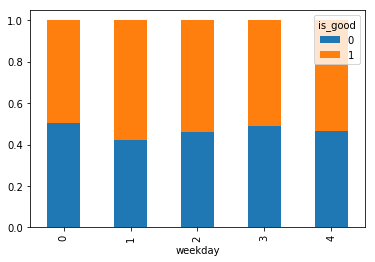

In [56]:
temp.div(temp.sum(axis=1),axis=0).plot(kind="bar",stacked=True)

In [57]:
data.pivot_table("is_good",index="weekday") # 统计的是is_good  计算公式  1*62 /125

,is_good
weekday,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


In [58]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [59]:
col.groupby("color")['price1'].mean() # 按照某一列分组，分组后使用聚合函数做统计

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [60]:
col['price1'].groupby(col['color']).mean() # 获取某一列值，按照另一列分组，分组后使用聚合函数做统计

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [61]:
col.groupby(['color'], as_index=False)['price1'].mean()

,color,price1
0,green,2.025
1,red,2.380
2,white,5.560


In [1]:
# 交差表和透视表

In [22]:
import numpy as np

In [8]:
data = pd.read_csv("./stock_day.csv")
p_change= data['p_change']

In [9]:
# 寻找星期几跟股票涨跌的关系
# 1、先根据对应的日期找到星期几
date = pd.to_datetime(data.index).weekday
data['week'] = date

# 2、把p_change按照大小分类，以0为界限
data['posi_neg'] = np.where(data['p_change'] > 0, 1, 0)

# 通过交叉表找寻两列数据的关系
count = pd.crosstab(data['week'], data['posi_neg'])

In [10]:
# 算数运算，先求和
count.sum(axis=1).astype(np.float32)

# 进行相除操作，得出比例
pro = count.div(count.sum(axis=1).astype(np.float32), axis=0)

查看效果

In [12]:
from matplotlib import pyplot as plt

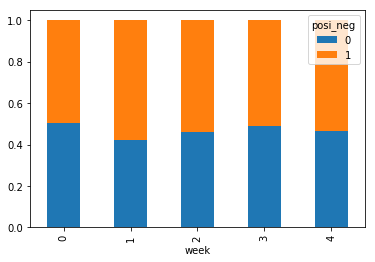

In [13]:
pro.plot(kind='bar', stacked=True)
plt.show()

### 使用pivot_table(透视表)实现

In [14]:
data.pivot_table(['posi_neg'],index=['week'])

,posi_neg
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


### 分组

> 要和聚合函数一起使用，不然没用

In [17]:
# groupby

In [18]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})

In [19]:
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [20]:
# 进行分组，对颜色分组，price进行聚合

In [21]:
col.groupby(['color'])['price1'].mean()
col['price1'].groupby(col['color']).mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [ ]:
# 分组数据的结构不变

In [22]:
col.groupby(['color'],as_index=False)['price1'].mean()

,color,price1
0,green,2.025
1,red,2.380
2,white,5.560


星巴克零售店铺数据统计

In [64]:
starbucks = pd.read_csv("directory.csv")
starbucks

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
5,Starbucks,17688-182164,"Dalma Mall, Ground Floor",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
6,Starbucks,18182-182165,"Dalma Mall, Level 1",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
7,Starbucks,23359-229184,Debenhams Yas Mall,Licensed,Yas Island,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.61,24.46
8,Starbucks,30781-99022,Khalidiya Street,Licensed,Khalidiya St.,Abu Dhabi,AZ,AE,NaN,26670052,GMT+04:00 Asia/Muscat,55.69,24.19
9,Starbucks,20423-205465,Eastern Mangroves,Licensed,"Al Salam Street, The Mangroves",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48


In [65]:
# 按照国家分组，求出每个国家的星巴克零售店数量
count=starbucks.groupby("Country").count()
count.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Postcode,Phone Number,Timezone,Longitude,Latitude
Country,,,,,,,,,,,,
AD,1,1,1,1,1,1,1,1,1,1,1,1
AE,144,144,144,144,144,144,144,24,78,144,144,144
AR,108,108,108,108,108,108,108,100,29,108,108,108
AT,18,18,18,18,18,18,18,18,17,18,18,18
AU,22,22,22,22,22,22,22,22,0,22,22,22


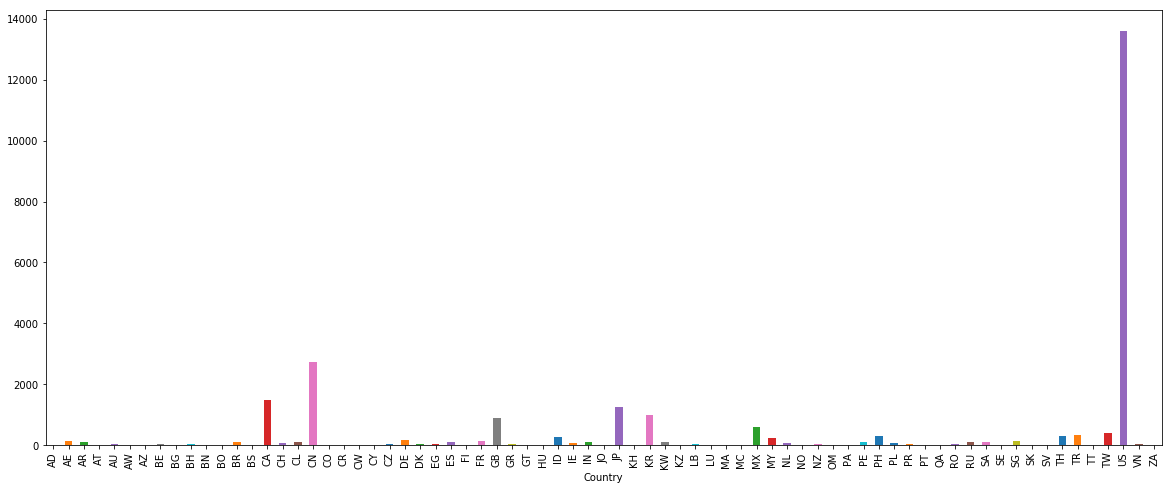

In [66]:
count['Brand'].plot(kind="bar",figsize=(20,8))

In [67]:
starbucks.groupby(['Country', 'State/Province']).count()

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
        RK                  3             3           3               3   
        SH                  6             6           6               6   
        UQ                  1             1           1               1   
AR      B                  21            21          21              21   
        C                  73            73          73              73   
        M                   5             5           5               5   
        S                   3             3           3               3   
        X                   6             6           6               6   
AT      3                   1             1           1               1   
        5                   3             3           3               3   
        9                  14            14          14              14   
AU      NSW                 9             9           9               9   
        QLD                 8             8           8               8   
        VIC                 5             5           5               5   
AW      AW                  3             3           3               3   
AZ      BA                  3             3           3               3   
        SAB                 1             1           1               1   
BE      BE                  4             4           4               4   
        VAN                 1             1           1               1   
        VBR                 2             2           2               2   
        VLG                10            10          10              10   
        WAL                 2             2           2               2   
BG      2                   1             1           1               1   
        23                  4             4           4               4   
BH      13                 16            16          16              16   
...                       ...           ...         ...             ...   
US      MO                188           188         188             188   
        MS                 32            32          32              32   
        MT                 36            36          36              36   
        NC                338           338         338             338   
        ND                 13            13          13              13   
        NE                 58            58          58              58   
        NH                 29            29          29              29   
        NJ                261           261         261             261   
        NM                 76            76          76              76   
        NV                253           253         253             253   
        NY                645           645         645             645   
        OH                378           378         378             378   
        OK                 79            79          79              79   
        OR                359           359         359             359   
        PA                357           357         357             357   
        RI                 27            27          27              27   
        SC                131           131         131             131   
        SD                 25            25          25              25   
        TN                180           180         180             180   
        TX               1042          1042        1042            1042   
        UT                101           101      

In [24]:
# 综合案例，电影数据

In [25]:
df = pd.read_csv('./IMDB-Movie-Data.csv')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [26]:
# 得出评分的平均分

In [27]:
df['Rating'].mean()

6.723200000000003

In [28]:
# 得出导演人数信息

In [32]:
np.unique(df['Director']).shape       # count?

(644,)

In [33]:
# 对于这一组电影数据，如果我们想看Rating，Runtime (Minutes)的分布情况，应该如何呈现数据？

In [34]:
# 选择分数列数据，进行plot,直接呈现画直方图

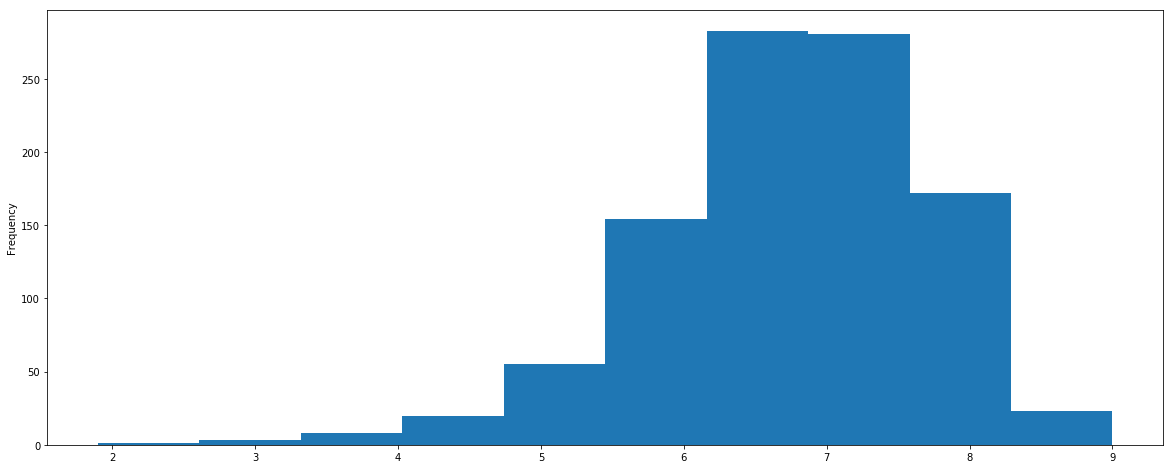

In [35]:
df['Rating'].plot(kind='hist',figsize=(20,8))

In [36]:
# Rating进行分布展示

In [40]:
# plt.figure(figsize=(20,8),dpi=80)   # 修改刻度等等在二者中间
# plt.hist(df['Rating'].values, bins=20)

(array([  1.,   0.,   2.,   1.,   2.,   6.,   7.,  13.,  15.,  40.,  78.,
         76., 156., 127., 171., 110., 117.,  55.,  20.,   3.]),
 array([1.9  , 2.255, 2.61 , 2.965, 3.32 , 3.675, 4.03 , 4.385, 4.74 ,
        5.095, 5.45 , 5.805, 6.16 , 6.515, 6.87 , 7.225, 7.58 , 7.935,
        8.29 , 8.645, 9.   ]),
 <a list of 20 Patch objects>)

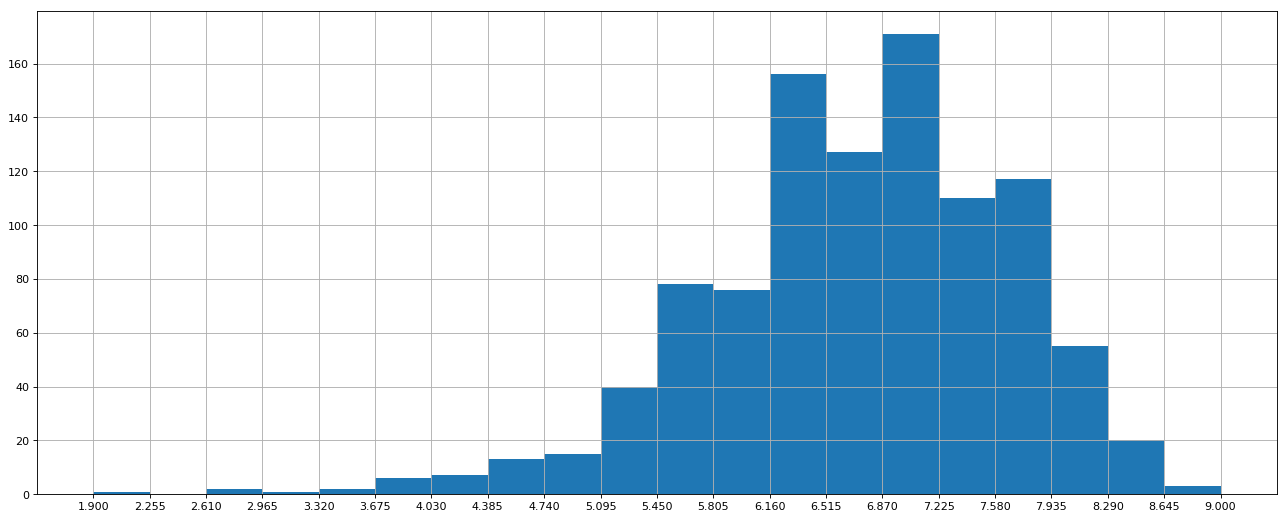

In [42]:
plt.figure(figsize=(20,8),dpi=80)

# 修改刻度
max_ = df["Rating"].max()
min_ = df["Rating"].min()
# 生成刻度列表
t1 = np.linspace(min_,max_,num=21)
# 修改刻度
plt.xticks(np.linspace(min_,max_,num=21))

# 添加网格
plt.grid()

plt.hist(df['Rating'].values, bins=20)

In [43]:
df['Genre']

0         Action,Adventure,Sci-Fi
1        Adventure,Mystery,Sci-Fi
2                 Horror,Thriller
3         Animation,Comedy,Family
4        Action,Adventure,Fantasy
5        Action,Adventure,Fantasy
6              Comedy,Drama,Music
7                          Comedy
8      Action,Adventure,Biography
9         Adventure,Drama,Romance
10       Adventure,Family,Fantasy
11        Biography,Drama,History
12        Action,Adventure,Sci-Fi
13     Animation,Adventure,Comedy
14            Action,Comedy,Drama
15     Animation,Adventure,Comedy
16        Biography,Drama,History
17                Action,Thriller
18                Biography,Drama
19           Drama,Mystery,Sci-Fi
20       Adventure,Drama,Thriller
21                          Drama
22             Crime,Drama,Horror
23     Animation,Adventure,Comedy
24        Action,Adventure,Sci-Fi
25                         Comedy
26         Action,Adventure,Drama
27                Horror,Thriller
28                         Comedy
29         Act

In [46]:
from collections import Counter
Counter(df['Genre'])

Counter({'Action': 2,
         'Action,Adventure': 3,
         'Action,Adventure,Biography': 2,
         'Action,Adventure,Comedy': 14,
         'Action,Adventure,Crime': 6,
         'Action,Adventure,Drama': 18,
         'Action,Adventure,Family': 4,
         'Action,Adventure,Fantasy': 27,
         'Action,Adventure,Horror': 2,
         'Action,Adventure,Mystery': 5,
         'Action,Adventure,Romance': 2,
         'Action,Adventure,Sci-Fi': 50,
         'Action,Adventure,Thriller': 11,
         'Action,Adventure,Western': 2,
         'Action,Biography,Crime': 1,
         'Action,Biography,Drama': 8,
         'Action,Comedy': 6,
         'Action,Comedy,Crime': 12,
         'Action,Comedy,Drama': 1,
         'Action,Comedy,Family': 1,
         'Action,Comedy,Fantasy': 3,
         'Action,Comedy,Horror': 2,
         'Action,Comedy,Mystery': 1,
         'Action,Comedy,Romance': 2,
         'Action,Comedy,Sci-Fi': 1,
         'Action,Comedy,Sport': 1,
         'Action,Crime,Drama': 17,
 

In [47]:
# 还要先把Genre 字符串分割，那个是三类
temp_list = [i.split(',') for i in df['Genre']]

In [50]:
temp_list

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [55]:
genre_list = [type for li in temp_list for type in li]
genre_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [63]:
result = Counter(genre_list)
result.items()

dict_items([('Action', 303), ('Adventure', 259), ('Sci-Fi', 120), ('Mystery', 106), ('Horror', 119), ('Thriller', 195), ('Animation', 49), ('Comedy', 279), ('Family', 51), ('Fantasy', 101), ('Drama', 513), ('Music', 16), ('Biography', 81), ('Romance', 141), ('History', 29), ('Crime', 150), ('Western', 7), ('War', 13), ('Musical', 5), ('Sport', 18)])

In [69]:
# dict(result)
pd.Series(dict(result))

Action       303
Adventure    259
Animation     49
Biography     81
Comedy       279
Crime        150
Drama        513
Family        51
Fantasy      101
History       29
Horror       119
Music         16
Musical        5
Mystery      106
Romance      141
Sci-Fi       120
Sport         18
Thriller     195
War           13
Western        7
dtype: int64

In [70]:
pd.DataFrame(dict(result))

ValueError: If using all scalar values, you must pass an index

In [71]:
ser = pd.Series(dict(result))
pd.DataFrame(ser)

,0
Action,303
Adventure,259
Animation,49
Biography,81
Comedy,279
Crime,150
Drama,513
Family,51
Fantasy,101
History,29
